<a href="https://colab.research.google.com/github/ashikaede/CCADMACL_EXAM/blob/main/Midterm%20Exam%20Colocado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CCADMACL (Midterm Exam)

## Import the libraries

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D

from collections import Counter

## Load the datasets

In [81]:
face_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/face.csv?raw=true")
chrome_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/chrome.csv?raw=true")
lines2_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/lines2.csv?raw=true")
supernova_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/supernova.csv?raw=true")
network_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/network.csv?raw=true")
spirals_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/spirals.csv?raw=true")
densedisk_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/densedisk.csv?raw=true")
rings_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/rings.csv?raw=true")
chainlink_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/chainlink.csv?raw=true")

## Plot the datasets

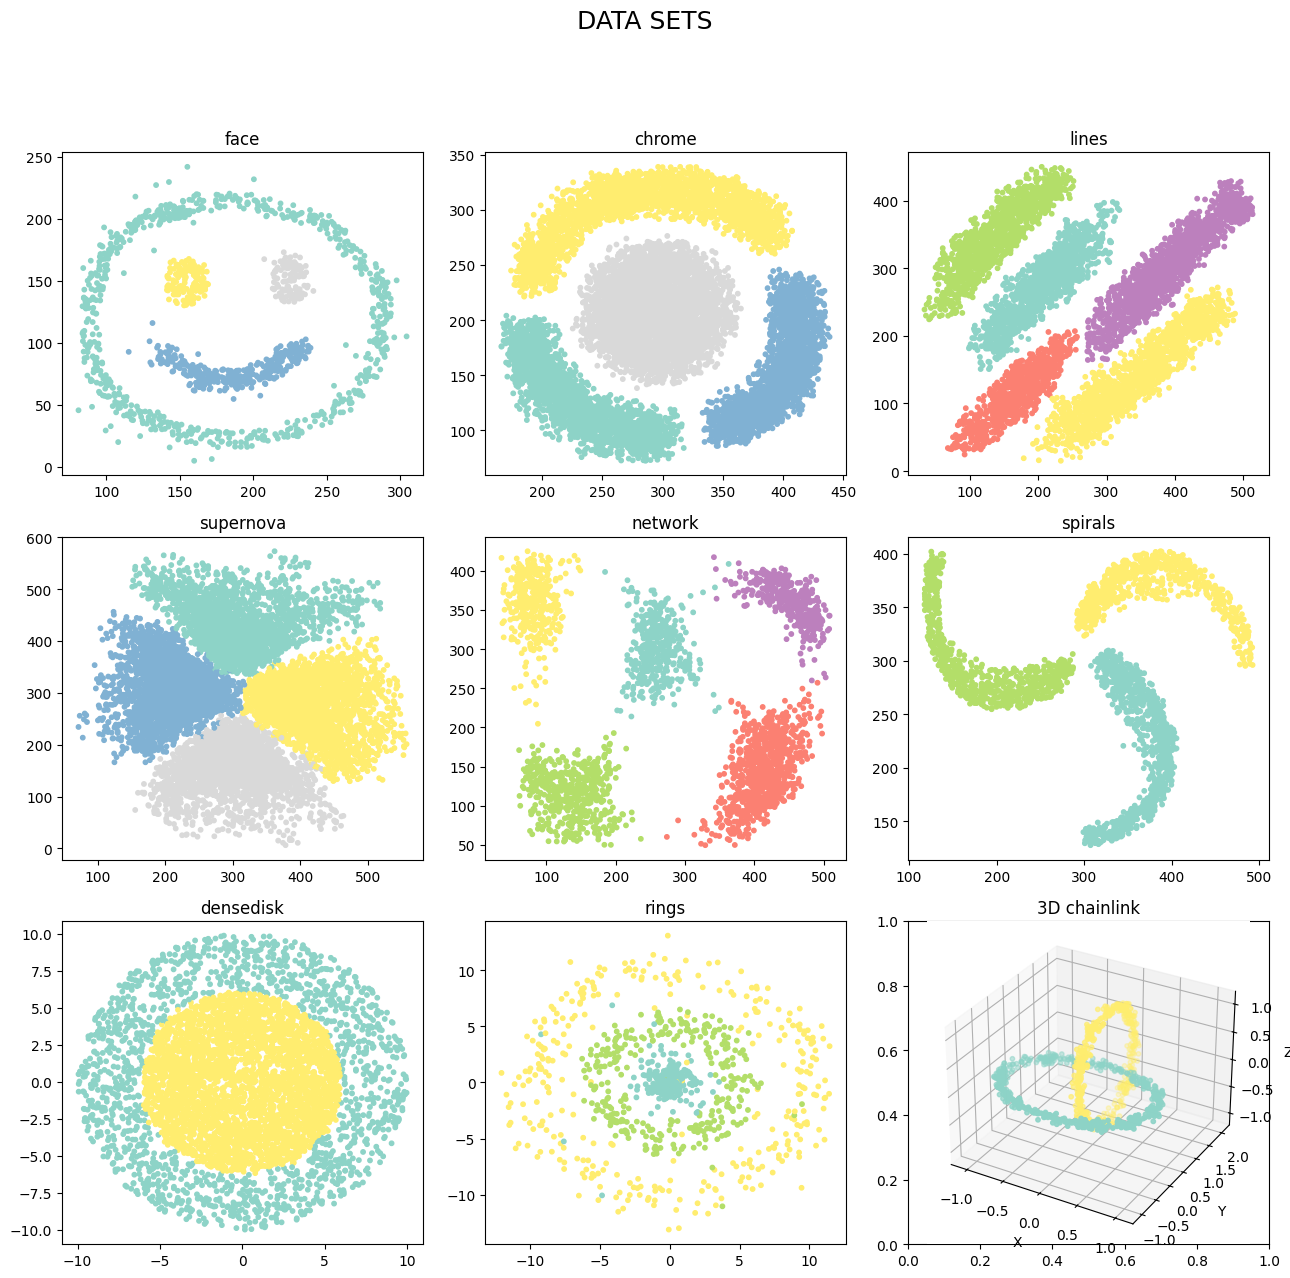

In [82]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 13))
fig.suptitle('DATA SETS\n', size=18)

# Plot the 2D scatterplots
axes[0, 0].scatter(face_df['x'], face_df['y'], c=face_df['color'], s=10, cmap="Set3")
axes[0, 0].set_title("face")

axes[0, 1].scatter(chrome_df['x'], chrome_df['y'], c=chrome_df['color'], s=10, cmap="Set3")
axes[0, 1].set_title("chrome")

axes[0, 2].scatter(lines2_df['x'], lines2_df['y'], c=lines2_df['color'], s=10, cmap="Set3")
axes[0, 2].set_title("lines")

axes[1, 0].scatter(supernova_df['x'], supernova_df['y'], c=supernova_df['color'], s=10, cmap="Set3")
axes[1, 0].set_title("supernova")

axes[1, 1].scatter(network_df['x'], network_df['y'], c=network_df['color'], s=10, cmap="Set3")
axes[1, 1].set_title("network")

axes[1, 2].scatter(spirals_df['x'], spirals_df['y'], c=spirals_df['color'], s=10, cmap="Set3")
axes[1, 2].set_title("spirals")

axes[2, 0].scatter(densedisk_df['x'], densedisk_df['y'], c=densedisk_df['color'], s=10, cmap="Set3")
axes[2, 0].set_title("densedisk")

axes[2, 1].scatter(rings_df['x'], rings_df['y'], c=rings_df['color'], s=10, cmap="Set3")
axes[2, 1].set_title("rings")

# Add a 3D plot
ax3d = fig.add_subplot(3, 3, 9, projection='3d')
ax3d.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d.set_title("3D chainlink")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

## A. Use K-means to cluster each dataset

1. Create each copy of the dataset for k-means

In [83]:
# put your answer here
face_df_kmeans = face_df.copy()
chrome_df_kmeans = chrome_df.copy()
lines2_df_kmeans = lines2_df.copy()
supernova_df_kmeans = supernova_df.copy()
network_df_kmeans = network_df.copy()
spirals_df_kmeans = spirals_df.copy()
densedisk_df_kmeans = densedisk_df.copy()
rings_df_kmeans = rings_df.copy()
chainlink_df_kmeans = chainlink_df.copy()

2. Drop the "color" column on all datasets

In [84]:
# put your answer here
face_df_kmeans = face_df_kmeans.drop(columns=['color'])
chrome_df_kmeans = chrome_df_kmeans.drop(columns=['color'])
lines2_df_kmeans = lines2_df_kmeans.drop(columns=['color'])
supernova_df_kmeans = supernova_df_kmeans.drop(columns=['color'])
network_df_kmeans = network_df_kmeans.drop(columns=['color'])
spirals_df_kmeans = spirals_df_kmeans.drop(columns=['color'])
densedisk_df_kmeans = densedisk_df_kmeans.drop(columns=['color'])
rings_df_kmeans = rings_df_kmeans.drop(columns=['color'])
chainlink_df_kmeans = chainlink_df_kmeans.drop(columns=['color'])

3. Train a K-means model for each dataset.

In [85]:
clusters_dict = {
    'face': 4,  # Example: 3 clusters for face dataset
    'chrome': 4,
    'lines': 5,
    'supernova': 4,
    'network': 5,
    'spirals': 3,
    'densedisk': 2,
    'rings': 3,
    'chainlink': 2
}



4. Add a "Cluster" column for each data set

In [86]:
# put your answer here

# Apply K-means and create a "Cluster" column
face_kmeans = KMeans(n_clusters=clusters_dict['face'], random_state=42)
face_df_kmeans['Cluster'] = face_kmeans.fit_predict(face_df_kmeans)

chrome_kmeans = KMeans(n_clusters=clusters_dict['chrome'], random_state=42)
chrome_df_kmeans['Cluster'] = chrome_kmeans.fit_predict(chrome_df_kmeans)

lines2_kmeans = KMeans(n_clusters=clusters_dict['lines'], random_state=42)
lines2_df_kmeans['Cluster'] = lines2_kmeans.fit_predict(lines2_df_kmeans)

supernova_kmeans = KMeans(n_clusters=clusters_dict['supernova'], random_state=42)
supernova_df_kmeans['Cluster'] = supernova_kmeans.fit_predict(supernova_df_kmeans)

network_kmeans = KMeans(n_clusters=clusters_dict['network'], random_state=42)
network_df_kmeans['Cluster'] = network_kmeans.fit_predict(network_df_kmeans)

spirals_kmeans = KMeans(n_clusters=clusters_dict['spirals'], random_state=42)
spirals_df_kmeans['Cluster'] = spirals_kmeans.fit_predict(spirals_df_kmeans)

densedisk_kmeans = KMeans(n_clusters=clusters_dict['densedisk'], random_state=42)
densedisk_df_kmeans['Cluster'] = densedisk_kmeans.fit_predict(densedisk_df_kmeans)

rings_kmeans = KMeans(n_clusters=clusters_dict['rings'], random_state=42)
rings_df_kmeans['Cluster'] = rings_kmeans.fit_predict(rings_df_kmeans)

chainlink_kmeans = KMeans(n_clusters=clusters_dict['chainlink'], random_state=42)
chainlink_df_kmeans['Cluster'] = chainlink_kmeans.fit_predict(chainlink_df_kmeans)

5. Plot the Correct cluster and the K-means cluster

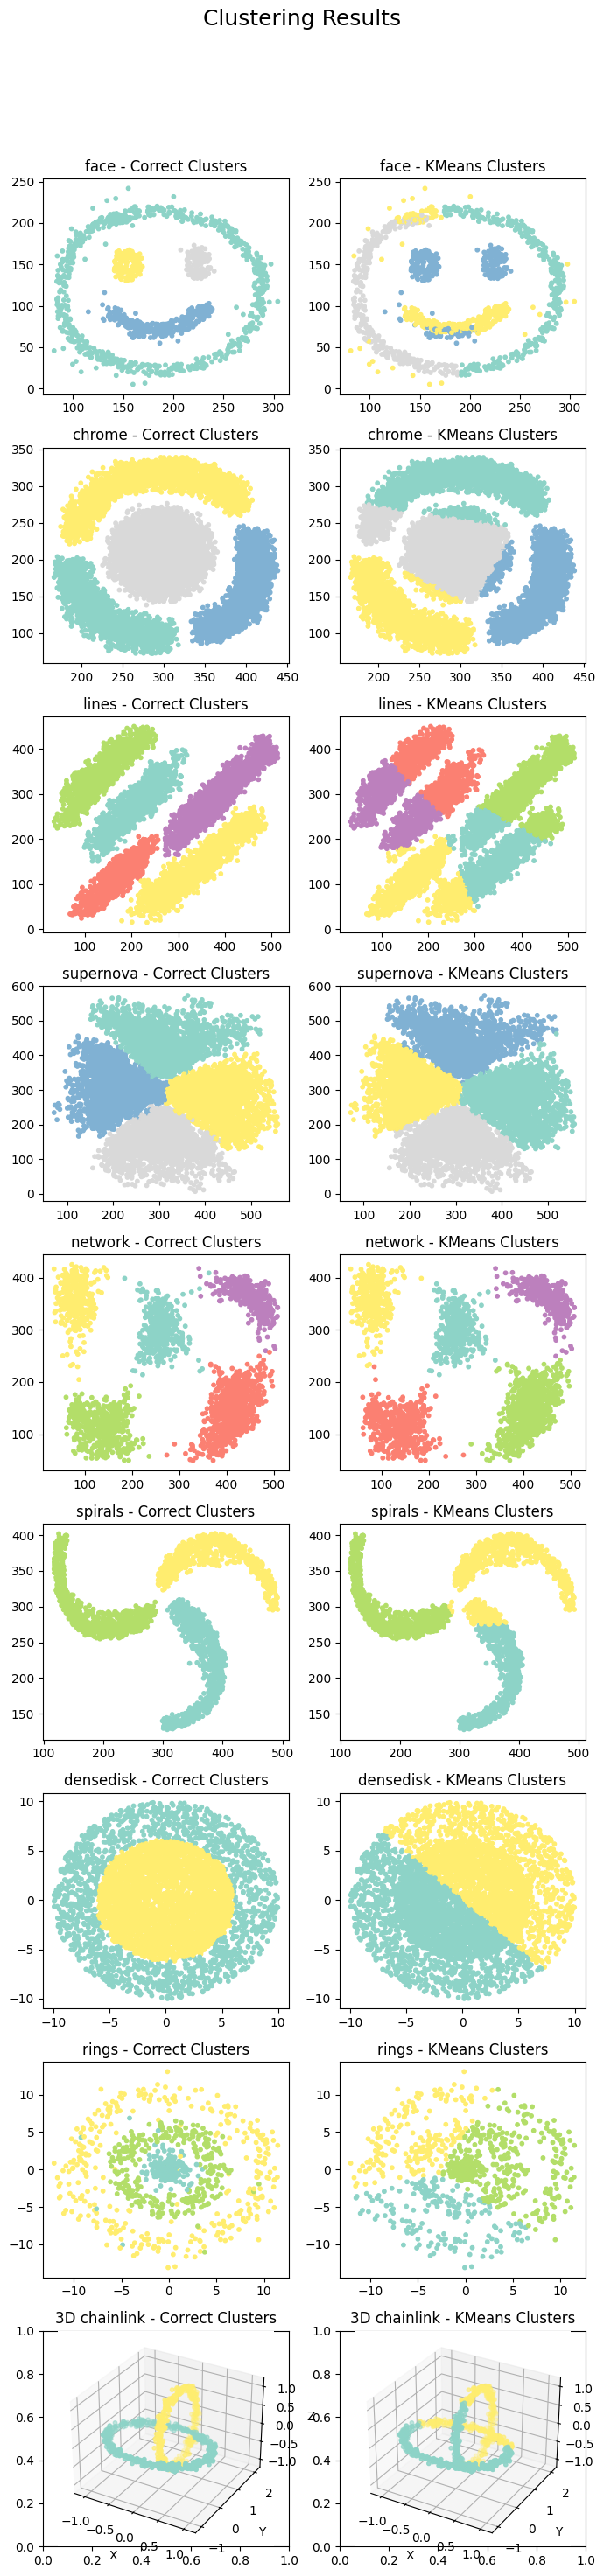

In [87]:
import matplotlib.pyplot as plt

# Define the layout for the subplots
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(7, 30))  # Adjusted for vertical layout
fig.suptitle('Clustering Results\n', size=18)

# Plot for face dataset
axes[0, 0].scatter(face_df['x'], face_df['y'], c=face_df['color'], s=10, cmap="Set3")
axes[0, 0].set_title("face - Correct Clusters")
axes[0, 1].scatter(face_df_kmeans['x'], face_df_kmeans['y'], c=face_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[0, 1].set_title("face - KMeans Clusters")

# Plot for chrome dataset
axes[1, 0].scatter(chrome_df['x'], chrome_df['y'], c=chrome_df['color'], s=10, cmap="Set3")
axes[1, 0].set_title("chrome - Correct Clusters")
axes[1, 1].scatter(chrome_df_kmeans['x'], chrome_df_kmeans['y'], c=chrome_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[1, 1].set_title("chrome - KMeans Clusters")

# Plot for lines2 dataset
axes[2, 0].scatter(lines2_df['x'], lines2_df['y'], c=lines2_df['color'], s=10, cmap="Set3")
axes[2, 0].set_title("lines - Correct Clusters")
axes[2, 1].scatter(lines2_df_kmeans['x'], lines2_df_kmeans['y'], c=lines2_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[2, 1].set_title("lines - KMeans Clusters")

# Plot for supernova dataset
axes[3, 0].scatter(supernova_df['x'], supernova_df['y'], c=supernova_df['color'], s=10, cmap="Set3")
axes[3, 0].set_title("supernova - Correct Clusters")
axes[3, 1].scatter(supernova_df_kmeans['x'], supernova_df_kmeans['y'], c=supernova_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[3, 1].set_title("supernova - KMeans Clusters")

# Plot for network dataset
axes[4, 0].scatter(network_df['x'], network_df['y'], c=network_df['color'], s=10, cmap="Set3")
axes[4, 0].set_title("network - Correct Clusters")
axes[4, 1].scatter(network_df_kmeans['x'], network_df_kmeans['y'], c=network_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[4, 1].set_title("network - KMeans Clusters")

# Plot for spirals dataset
axes[5, 0].scatter(spirals_df['x'], spirals_df['y'], c=spirals_df['color'], s=10, cmap="Set3")
axes[5, 0].set_title("spirals - Correct Clusters")
axes[5, 1].scatter(spirals_df_kmeans['x'], spirals_df_kmeans['y'], c=spirals_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[5, 1].set_title("spirals - KMeans Clusters")

# Plot for densedisk dataset
axes[6, 0].scatter(densedisk_df['x'], densedisk_df['y'], c=densedisk_df['color'], s=10, cmap="Set3")
axes[6, 0].set_title("densedisk - Correct Clusters")
axes[6, 1].scatter(densedisk_df_kmeans['x'], densedisk_df_kmeans['y'], c=densedisk_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[6, 1].set_title("densedisk - KMeans Clusters")

# Plot for rings dataset
axes[7, 0].scatter(rings_df['x'], rings_df['y'], c=rings_df['color'], s=10, cmap="Set3")
axes[7, 0].set_title("rings - Correct Clusters")
axes[7, 1].scatter(rings_df_kmeans['x'], rings_df_kmeans['y'], c=rings_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[7, 1].set_title("rings - KMeans Clusters")

# Add a 3D plot for chainlink (Correct Clusters)
ax3d = fig.add_subplot(9, 2, 17, projection='3d')
ax3d.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d.set_title("3D chainlink - Correct Clusters")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

# Add a 3D plot for chainlink (KMeans Clusters)
ax3d_kmeans = fig.add_subplot(9, 2, 18, projection='3d')
ax3d_kmeans.scatter(chainlink_df_kmeans['x'], chainlink_df_kmeans['y'], chainlink_df_kmeans['z'], c=chainlink_df_kmeans['Cluster'], cmap="Set3", s=10)
ax3d_kmeans.set_title("3D chainlink - KMeans Clusters")
ax3d_kmeans.set_xlabel("X")
ax3d_kmeans.set_ylabel("Y")
ax3d_kmeans.set_zlabel("Z")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## B. Use Agglomerative Clustering to cluster each dataset

1. Create each copy of the dataset for Agglomerative Clustering

In [88]:
# put your answer here
face_df_agg = face_df.copy()
chrome_df_agg = chrome_df.copy()
lines2_df_agg = lines2_df.copy()
supernova_df_agg = supernova_df.copy()
network_df_agg = network_df.copy()
spirals_df_agg = spirals_df.copy()
densedisk_df_agg = densedisk_df.copy()
rings_df_agg = rings_df.copy()
chainlink_df_agg = chainlink_df.copy()

2. Drop the "color" column on all datasets

In [89]:
# put your answer here
face_df_agg = face_df_agg.drop(columns=['color'])
chrome_df_agg = chrome_df_agg.drop(columns=['color'])
lines2_df_agg = lines2_df_agg.drop(columns=['color'])
supernova_df_agg = supernova_df_agg.drop(columns=['color'])
network_df_agg = network_df_agg.drop(columns=['color'])
spirals_df_agg = spirals_df_agg.drop(columns=['color'])
densedisk_df_agg = densedisk_df_agg.drop(columns=['color'])
rings_df_agg = rings_df_agg.drop(columns=['color'])
chainlink_df_agg = chainlink_df_agg.drop(columns=['color'])

3. Train a Agglomerative Clustering model for each dataset.

In [90]:
# put your answer here
clusters_dict_agg = {
     'face': 4,
    'chrome': 4,
    'lines': 5,
    'supernova': 4,
    'network': 5,
    'spirals': 3,
    'densedisk': 2,
    'rings': 3,
    'chainlink': 2
}


4. Add a "Cluster" column for each data set

In [91]:
# put your answer here

# Apply Agglomerative Clustering and create a "Cluster" column
agg_clust = AgglomerativeClustering()

face_agg = AgglomerativeClustering(n_clusters=clusters_dict_agg['face'])
face_df_agg['Cluster'] = face_agg.fit_predict(face_df_agg)

chrome_agg = AgglomerativeClustering(n_clusters=clusters_dict_agg['chrome'])
chrome_df_agg['Cluster'] = chrome_agg.fit_predict(chrome_df_agg)

lines2_agg = AgglomerativeClustering(n_clusters=clusters_dict_agg['lines'])
lines2_df_agg['Cluster'] = lines2_agg.fit_predict(lines2_df_agg)

supernova_agg = AgglomerativeClustering(n_clusters=clusters_dict_agg['supernova'])
supernova_df_agg['Cluster'] = supernova_agg.fit_predict(supernova_df_agg)

network_agg = AgglomerativeClustering(n_clusters=clusters_dict_agg['network'])
network_df_agg['Cluster'] = network_agg.fit_predict(network_df_agg)

spirals_agg = AgglomerativeClustering(n_clusters=clusters_dict_agg['spirals'])
spirals_df_agg['Cluster'] = spirals_agg.fit_predict(spirals_df_agg)

densedisk_agg = AgglomerativeClustering(n_clusters=clusters_dict_agg['densedisk'])
densedisk_df_agg['Cluster'] = densedisk_agg.fit_predict(densedisk_df_agg)

rings_agg = AgglomerativeClustering(n_clusters=clusters_dict_agg['rings'])
rings_df_agg['Cluster'] = rings_agg.fit_predict(rings_df_agg)

chainlink_agg = AgglomerativeClustering(n_clusters=clusters_dict_agg['chainlink'])
chainlink_df_agg['Cluster'] = chainlink_agg.fit_predict(chainlink_df_agg)

5. Plot the Correct cluster and the Agglomerative cluster

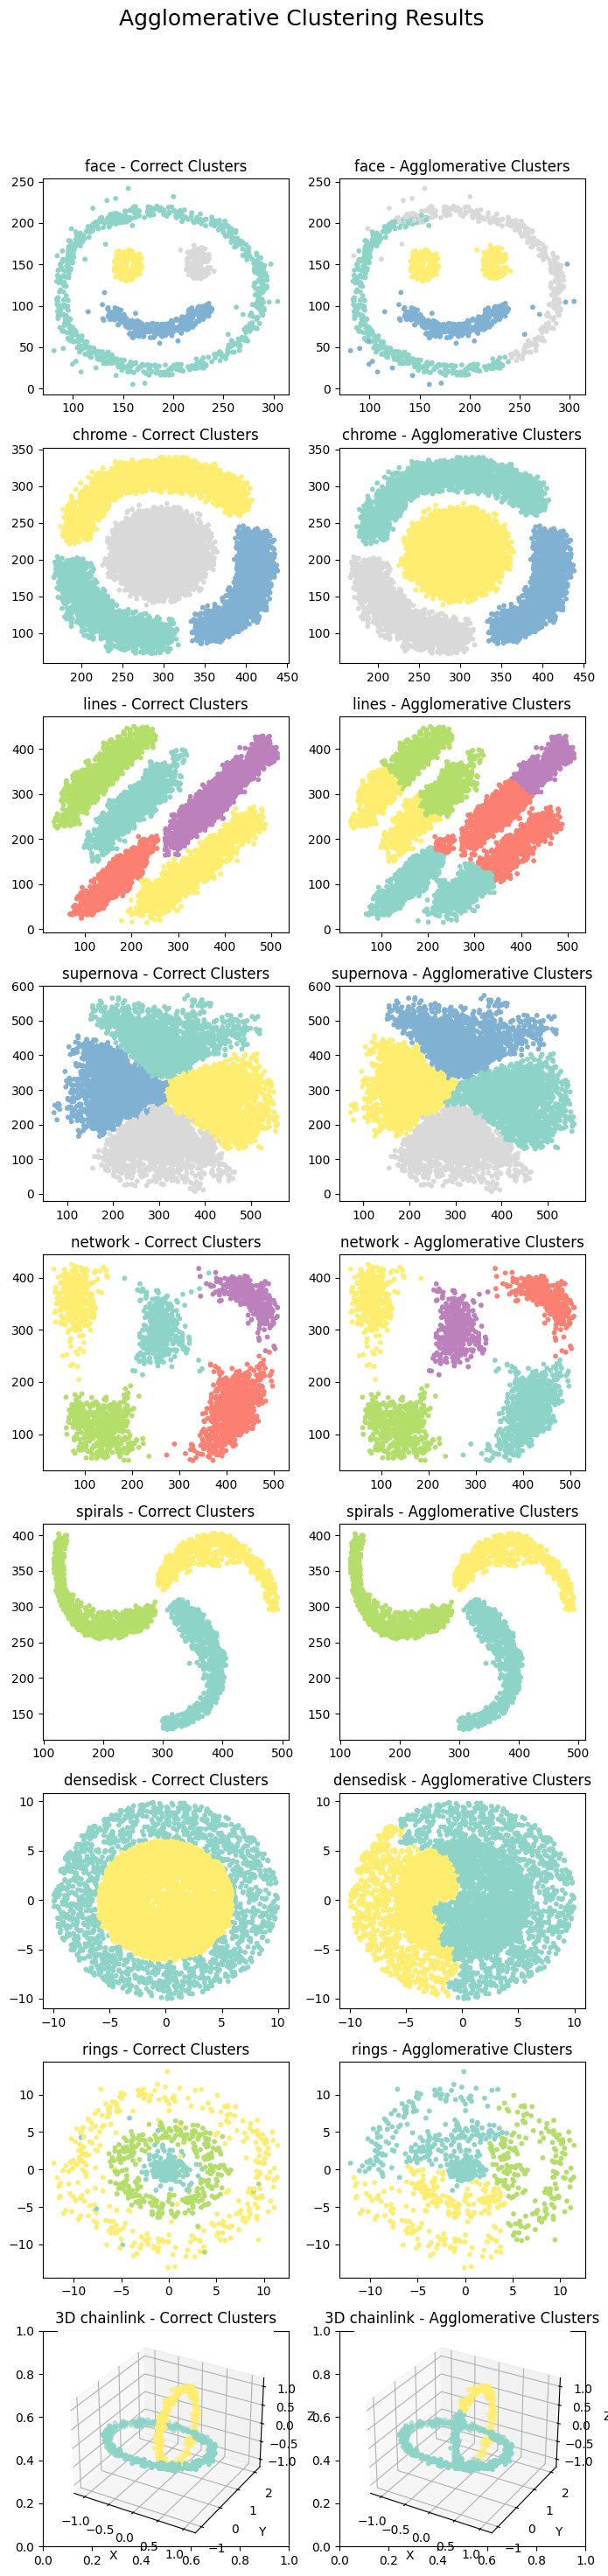

In [92]:
# put your answer here
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(7, 30))  # Adjusted for vertical layout
fig.suptitle('Agglomerative Clustering Results\n', size=18)

# Plot for face dataset
axes[0, 0].scatter(face_df['x'], face_df['y'], c=face_df['color'], s=10, cmap="Set3")
axes[0, 0].set_title("face - Correct Clusters")
axes[0, 1].scatter(face_df_agg['x'], face_df_agg['y'], c=face_df_agg['Cluster'], s=10, cmap="Set3")
axes[0, 1].set_title("face - Agglomerative Clusters")

# Plot for chrome dataset
axes[1, 0].scatter(chrome_df['x'], chrome_df['y'], c=chrome_df['color'], s=10, cmap="Set3")
axes[1, 0].set_title("chrome - Correct Clusters")
axes[1, 1].scatter(chrome_df_agg['x'], chrome_df_agg['y'], c=chrome_df_agg['Cluster'], s=10, cmap="Set3")
axes[1, 1].set_title("chrome - Agglomerative Clusters")

# Plot for lines2 dataset
axes[2, 0].scatter(lines2_df['x'], lines2_df['y'], c=lines2_df['color'], s=10, cmap="Set3")
axes[2, 0].set_title("lines - Correct Clusters")
axes[2, 1].scatter(lines2_df_agg['x'], lines2_df_agg['y'], c=lines2_df_agg['Cluster'], s=10, cmap="Set3")
axes[2, 1].set_title("lines - Agglomerative Clusters")

# Plot for supernova dataset
axes[3, 0].scatter(supernova_df['x'], supernova_df['y'], c=supernova_df['color'], s=10, cmap="Set3")
axes[3, 0].set_title("supernova - Correct Clusters")
axes[3, 1].scatter(supernova_df_agg['x'], supernova_df_agg['y'], c=supernova_df_agg['Cluster'], s=10, cmap="Set3")
axes[3, 1].set_title("supernova - Agglomerative Clusters")

# Plot for network dataset
axes[4, 0].scatter(network_df['x'], network_df['y'], c=network_df['color'], s=10, cmap="Set3")
axes[4, 0].set_title("network - Correct Clusters")
axes[4, 1].scatter(network_df_agg['x'], network_df_agg['y'], c=network_df_agg['Cluster'], s=10, cmap="Set3")
axes[4, 1].set_title("network - Agglomerative Clusters")

# Plot for spirals dataset
axes[5, 0].scatter(spirals_df['x'], spirals_df['y'], c=spirals_df['color'], s=10, cmap="Set3")
axes[5, 0].set_title("spirals - Correct Clusters")
axes[5, 1].scatter(spirals_df_agg['x'], spirals_df_agg['y'], c=spirals_df_agg['Cluster'], s=10, cmap="Set3")
axes[5, 1].set_title("spirals - Agglomerative Clusters")

# Plot for densedisk dataset
axes[6, 0].scatter(densedisk_df['x'], densedisk_df['y'], c=densedisk_df['color'], s=10, cmap="Set3")
axes[6, 0].set_title("densedisk - Correct Clusters")
axes[6, 1].scatter(densedisk_df_agg['x'], densedisk_df_agg['y'], c=densedisk_df_agg['Cluster'], s=10, cmap="Set3")
axes[6, 1].set_title("densedisk - Agglomerative Clusters")

# Plot for rings dataset
axes[7, 0].scatter(rings_df['x'], rings_df['y'], c=rings_df['color'], s=10, cmap="Set3")
axes[7, 0].set_title("rings - Correct Clusters")
axes[7, 1].scatter(rings_df_agg['x'], rings_df_agg['y'], c=rings_df_agg['Cluster'], s=10, cmap="Set3")
axes[7, 1].set_title("rings - Agglomerative Clusters")

# Add a 3D plot for chainlink (Correct Clusters)
ax3d = fig.add_subplot(9, 2, 17, projection='3d')
ax3d.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d.set_title("3D chainlink - Correct Clusters")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

# Add a 3D plot for chainlink (Agglomerative Clusters)
ax3d_agg = fig.add_subplot(9, 2, 18, projection='3d')
ax3d_agg.scatter(chainlink_df_agg['x'], chainlink_df_agg['y'], chainlink_df_agg['z'], c=chainlink_df_agg['Cluster'], cmap="Set3", s=10)
ax3d_agg.set_title("3D chainlink - Agglomerative Clusters")
ax3d_agg.set_xlabel("X")
ax3d_agg.set_ylabel("Y")
ax3d_agg.set_zlabel("Z")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## C. Use DBSCAN to cluster each dataset

---



1. Create each copy of the dataset for Agglomerative Clustering

In [93]:
face_df_dbscan = face_df.copy()
chrome_df_dbscan = chrome_df.copy()
lines2_df_dbscan = lines2_df.copy()
supernova_df_dbscan = supernova_df.copy()
network_df_dbscan = network_df.copy()
spirals_df_dbscan = spirals_df.copy()
densedisk_df_dbscan = densedisk_df.copy()
rings_df_dbscan = rings_df.copy()
chainlink_df_dbscan = chainlink_df.copy()

2. Drop the "color" column on all datasets

In [94]:
face_df_dbscan = face_df_dbscan.drop(columns=['color'])
chrome_df_dbscan = chrome_df_dbscan.drop(columns=['color'])
lines2_df_dbscan = lines2_df_dbscan.drop(columns=['color'])
supernova_df_dbscan = supernova_df_dbscan.drop(columns=['color'])
network_df_dbscan = network_df_dbscan.drop(columns=['color'])
spirals_df_dbscan = spirals_df_dbscan.drop(columns=['color'])
densedisk_df_dbscan = densedisk_df_dbscan.drop(columns=['color'])
rings_df_dbscan = rings_df_dbscan.drop(columns=['color'])
chainlink_df_dbscan = chainlink_df_dbscan.drop(columns=['color'])

3. 3. Train a DBSCAN Clustering model for each dataset.
 and Add a "Cluster" column for each data set

In [127]:
# Parameters for DBSCAN can vary; tweak eps and min_samples as needed
def apply_dbscan(dataset, eps, min_samples):
   dbscan = DBSCAN(eps=eps, min_samples=min_samples)
   return dbscan.fit_predict(dataset)
face_df_dbscan['Cluster'] = apply_dbscan(face_df_dbscan, eps=30, min_samples=1)
chrome_df_dbscan['Cluster'] = apply_dbscan(chrome_df_dbscan, eps=10, min_samples=9)
lines2_df_dbscan['Cluster'] = apply_dbscan(lines2_df_dbscan, eps=0.2, min_samples=5)
supernova_df_dbscan['Cluster'] = apply_dbscan(supernova_df_dbscan, eps=2.5, min_samples=10)
network_df_dbscan['Cluster'] = apply_dbscan(network_df_dbscan, eps=1.5, min_samples=5)
spirals_df_dbscan['Cluster'] = apply_dbscan(spirals_df_dbscan, eps=1, min_samples=5)
densedisk_df_dbscan['Cluster'] = apply_dbscan(densedisk_df_dbscan, eps=0.5, min_samples=18)
rings_df_dbscan['Cluster'] = apply_dbscan(rings_df_dbscan, eps=0.5, min_samples=5)
chainlink_df_dbscan['Cluster'] = apply_dbscan(chainlink_df_dbscan, eps=0.5, min_samples=5)

5. Plot the Correct cluster and the DBSCAN cluster

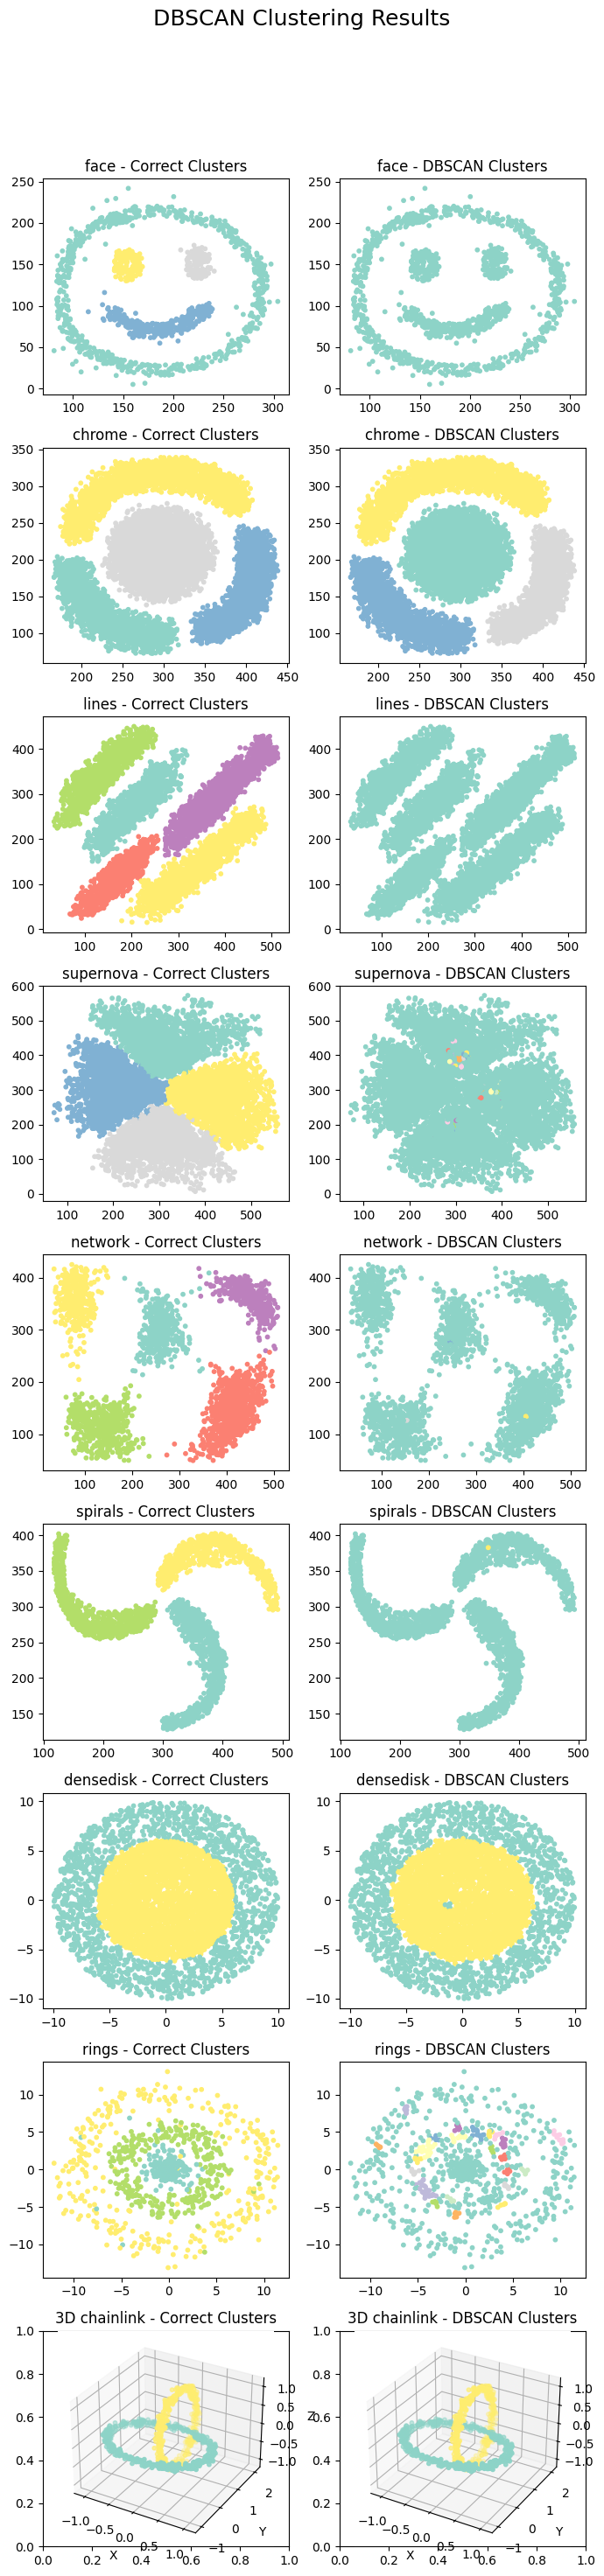

In [128]:
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(7, 30))  # Adjusted for vertical layout
fig.suptitle('DBSCAN Clustering Results\n', size=18)
# Plot for face dataset
axes[0, 0].scatter(face_df['x'], face_df['y'], c=face_df['color'], s=10, cmap="Set3")
axes[0, 0].set_title("face - Correct Clusters")
axes[0, 1].scatter(face_df_dbscan['x'], face_df_dbscan['y'], c=face_df_dbscan['Cluster'], s=10, cmap="Set3")
axes[0, 1].set_title("face - DBSCAN Clusters")
# Plot for chrome dataset
axes[1, 0].scatter(chrome_df['x'], chrome_df['y'], c=chrome_df['color'], s=10, cmap="Set3")
axes[1, 0].set_title("chrome - Correct Clusters")
axes[1, 1].scatter(chrome_df_dbscan['x'], chrome_df_dbscan['y'], c=chrome_df_dbscan['Cluster'], s=10, cmap="Set3")
axes[1, 1].set_title("chrome - DBSCAN Clusters")
# Plot for lines2 dataset
axes[2, 0].scatter(lines2_df['x'], lines2_df['y'], c=lines2_df['color'], s=10, cmap="Set3")
axes[2, 0].set_title("lines - Correct Clusters")
axes[2, 1].scatter(lines2_df_dbscan['x'], lines2_df_dbscan['y'], c=lines2_df_dbscan['Cluster'], s=10, cmap="Set3")
axes[2, 1].set_title("lines - DBSCAN Clusters")
# Plot for supernova dataset
axes[3, 0].scatter(supernova_df['x'], supernova_df['y'], c=supernova_df['color'], s=10, cmap="Set3")
axes[3, 0].set_title("supernova - Correct Clusters")
axes[3, 1].scatter(supernova_df_dbscan['x'], supernova_df_dbscan['y'], c=supernova_df_dbscan['Cluster'], s=10, cmap="Set3")
axes[3, 1].set_title("supernova - DBSCAN Clusters")
# Plot for network dataset
axes[4, 0].scatter(network_df['x'], network_df['y'], c=network_df['color'], s=10, cmap="Set3")
axes[4, 0].set_title("network - Correct Clusters")
axes[4, 1].scatter(network_df_dbscan['x'], network_df_dbscan['y'], c=network_df_dbscan['Cluster'], s=10, cmap="Set3")
axes[4, 1].set_title("network - DBSCAN Clusters")
# Plot for spirals dataset
axes[5, 0].scatter(spirals_df['x'], spirals_df['y'], c=spirals_df['color'], s=10, cmap="Set3")
axes[5, 0].set_title("spirals - Correct Clusters")
axes[5, 1].scatter(spirals_df_dbscan['x'], spirals_df_dbscan['y'], c=spirals_df_dbscan['Cluster'], s=10, cmap="Set3")
axes[5, 1].set_title("spirals - DBSCAN Clusters")
# Plot for densedisk dataset
axes[6, 0].scatter(densedisk_df['x'], densedisk_df['y'], c=densedisk_df['color'], s=10, cmap="Set3")
axes[6, 0].set_title("densedisk - Correct Clusters")
axes[6, 1].scatter(densedisk_df_dbscan['x'], densedisk_df_dbscan['y'], c=densedisk_df_dbscan['Cluster'], s=10, cmap="Set3")
axes[6, 1].set_title("densedisk - DBSCAN Clusters")
# Plot for rings dataset
axes[7, 0].scatter(rings_df['x'], rings_df['y'], c=rings_df['color'], s=10, cmap="Set3")
axes[7, 0].set_title("rings - Correct Clusters")
axes[7, 1].scatter(rings_df_dbscan['x'], rings_df_dbscan['y'], c=rings_df_dbscan['Cluster'], s=10, cmap="Set3")
axes[7, 1].set_title("rings - DBSCAN Clusters")
# Add a 3D plot for chainlink (Correct Clusters)
ax3d = fig.add_subplot(9, 2, 17, projection='3d')
ax3d.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d.set_title("3D chainlink - Correct Clusters")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")
# Add a 3D plot for chainlink (DBSCAN Clusters)
ax3d_dbscan = fig.add_subplot(9, 2, 18, projection='3d')
ax3d_dbscan.scatter(chainlink_df_dbscan['x'], chainlink_df_dbscan['y'], chainlink_df_dbscan['z'], c=chainlink_df_dbscan['Cluster'], cmap="Set3", s=10)
ax3d_dbscan.set_title("3D chainlink - DBSCAN Clusters")
ax3d_dbscan.set_xlabel("X")
ax3d_dbscan.set_ylabel("Y")
ax3d_dbscan.set_zlabel("Z")
# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## D. Compare all algorithms

1. Display the Correct cluster, K-means cluster, Agglomerative cluster and DBSCAN cluster in a single plot.

- Each row should contain each dataset
- Each column should contain each the correct cluster, k-means cluster, agglomerative cluster and DBSCAN cluster.

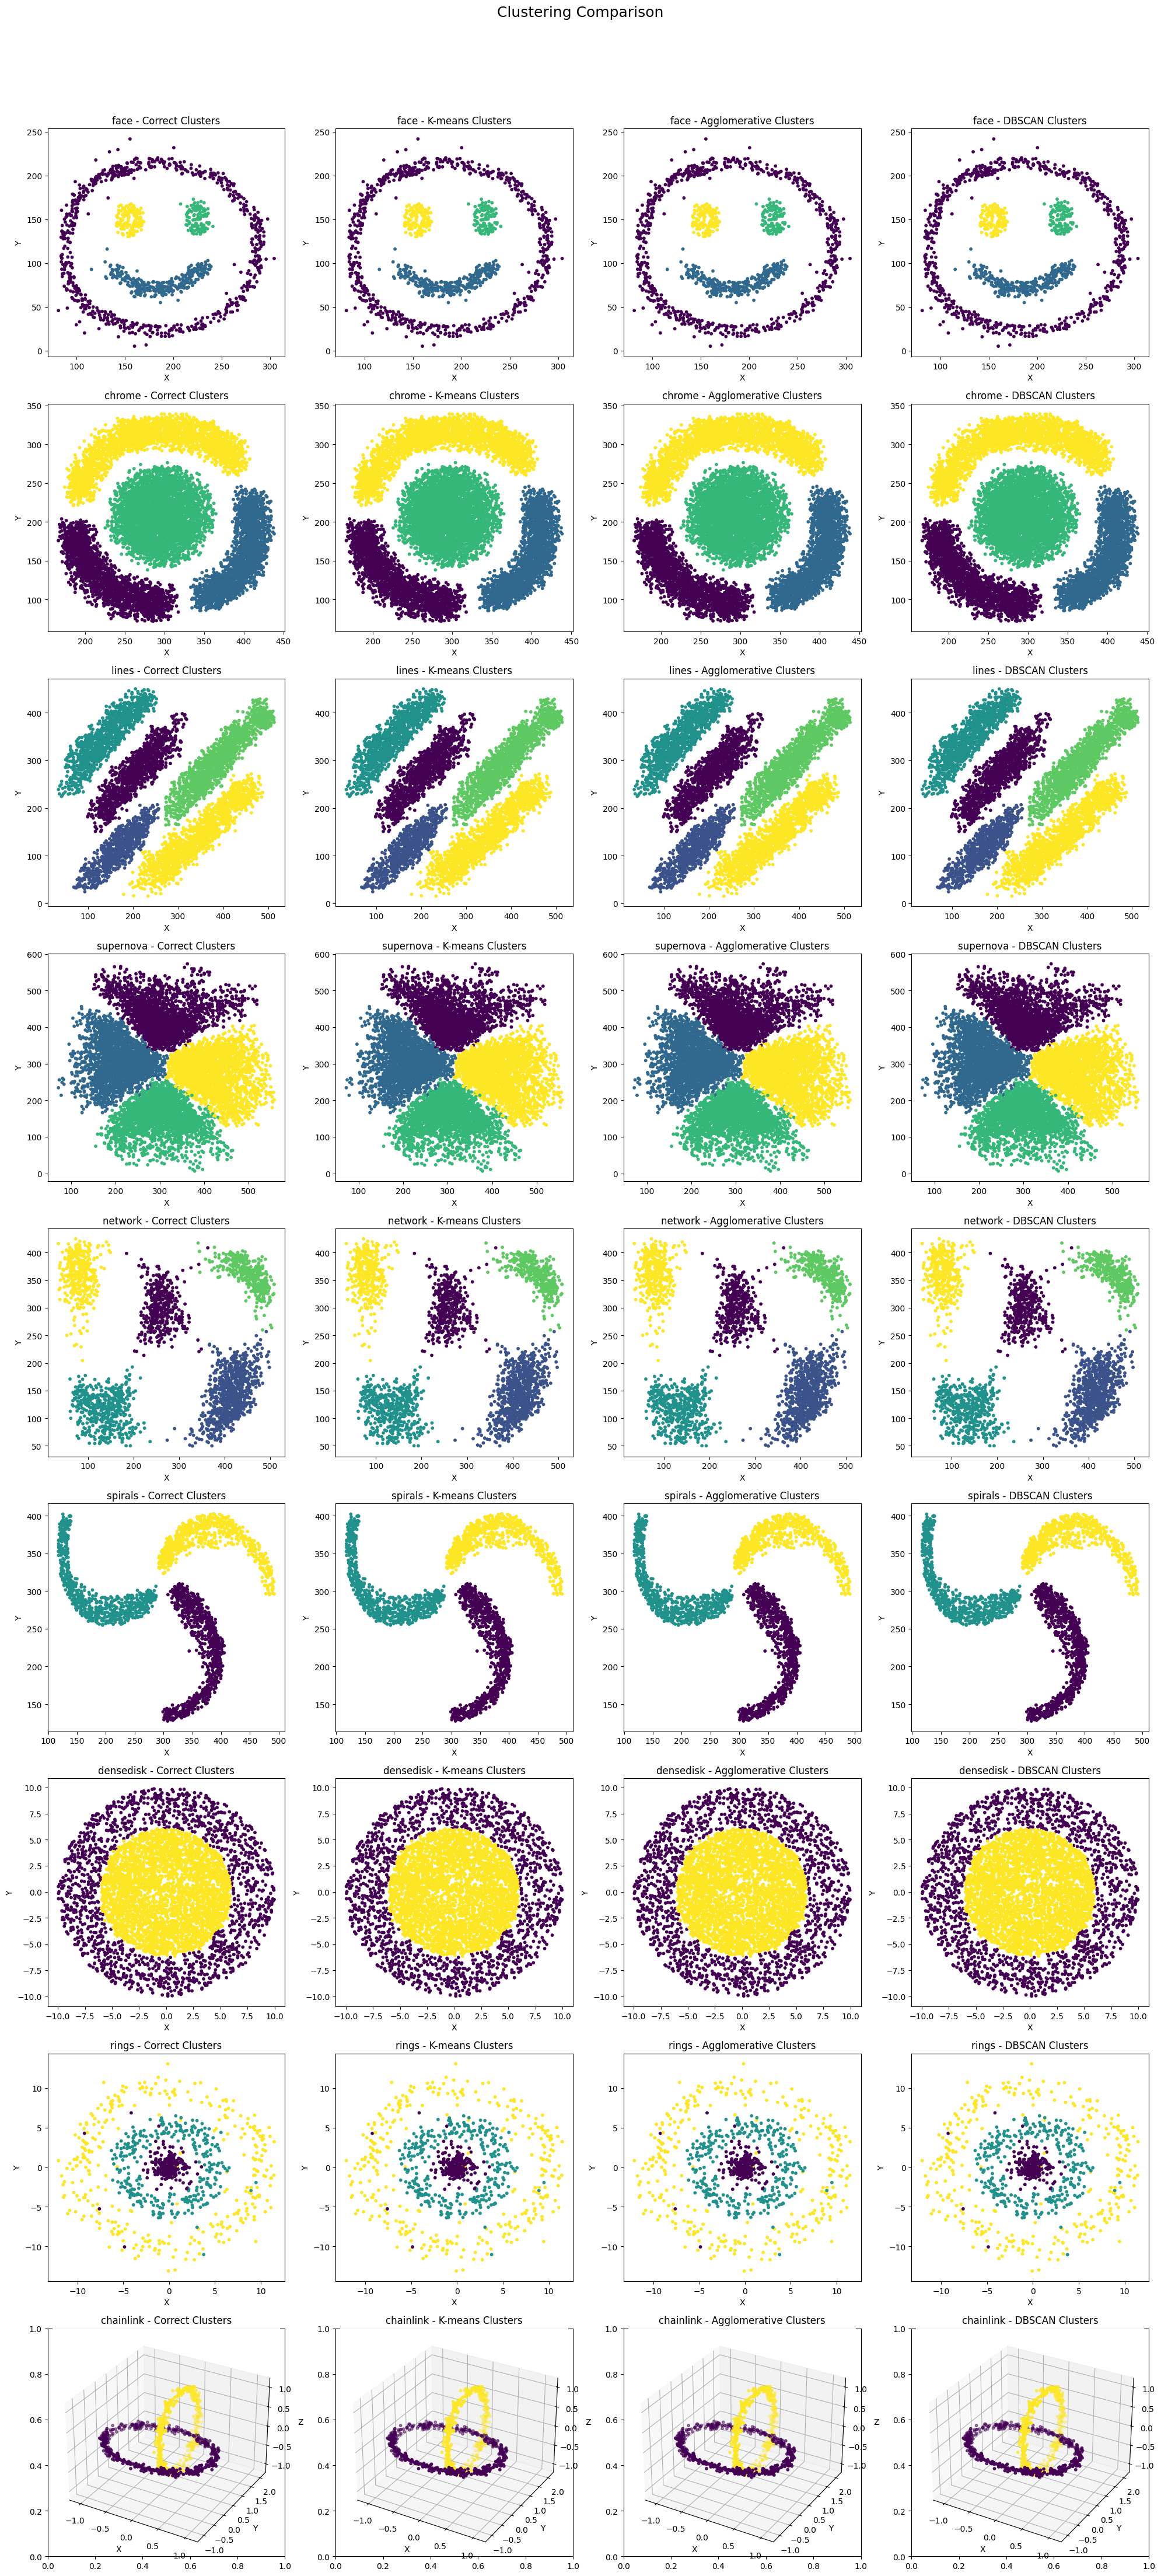

In [137]:
import matplotlib.pyplot as plt

# Assume the datasets and their cluster labels are already available:
# - `face_df`, `chrome_df`, ..., `chainlink_df`
# - Each dataset contains columns: 'x', 'y', 'z' (if 3D), 'color' (correct clusters),
#   'KMeans', 'Agglomerative', 'DBSCAN'

datasets = {
    "face": face_df,
    "chrome": chrome_df,
    "lines": lines2_df,
    "supernova": supernova_df,
    "network": network_df,
    "spirals": spirals_df,
    "densedisk": densedisk_df,
    "rings": rings_df,
    "chainlink": chainlink_df,
}

# Define titles for columns
titles = ["Correct Clusters", "K-means Clusters", "Agglomerative Clusters", "DBSCAN Clusters"]

# Create subplots: rows = number of datasets, columns = 4 (Correct, K-means, Agglomerative, DBSCAN)
fig, axes = plt.subplots(len(datasets), 4, figsize=(20, len(datasets) * 5))
fig.suptitle("Clustering Comparison", fontsize=18)

# Iterate over each dataset and plot the results
for row_idx, (dataset_name, dataset) in enumerate(datasets.items()):
    # Check if dataset has 3D data
    is_3D = 'z' in dataset.columns

    # Features for 2D or 3D plotting
    features = ['x', 'y', 'z'] if is_3D else ['x', 'y']

    # Plot each type of cluster
    for col_idx, col_name in enumerate(['color', 'KMeans', 'Agglomerative', 'DBSCAN']):
        if is_3D:  # 3D plotting
            ax = fig.add_subplot(len(datasets), 4, row_idx * 4 + col_idx + 1, projection='3d')
            ax.scatter(
                dataset['x'], dataset['y'], dataset['z'],
                c=dataset[col_name] if col_name in dataset.columns else dataset['color'], # Use 'color' if col_name not found
                cmap='viridis', s=10
            )
            ax.set_xlabel("X")
            ax.set_ylabel("Y")
            ax.set_zlabel("Z")
        else:  # 2D plotting
            # Access 'x', 'y', and col_name from the dataset DataFrame, not datasets dictionary
            axes[row_idx, col_idx].scatter(
                dataset['x'], dataset['y'],
                c=dataset[col_name] if col_name in dataset.columns else dataset['color'], # Use 'color' if col_name not found
                cmap='viridis', s=10
            )
            axes[row_idx, col_idx].set_xlabel("X")
            axes[row_idx, col_idx].set_ylabel("Y")

        # Set the title for each subplot
        title = titles[col_idx]
        if is_3D:
            ax.set_title(f"{dataset_name} - {title}")
        else:
            axes[row_idx, col_idx].set_title(f"{dataset_name} - {title}")

# Adjust layout for better visualization
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()